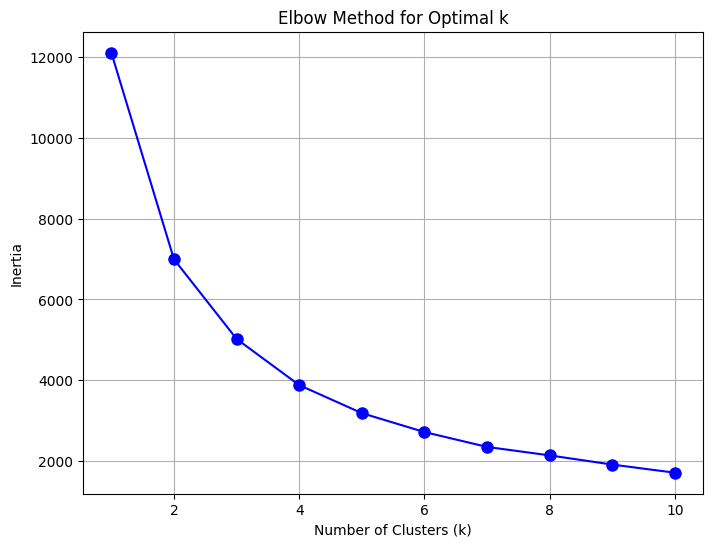

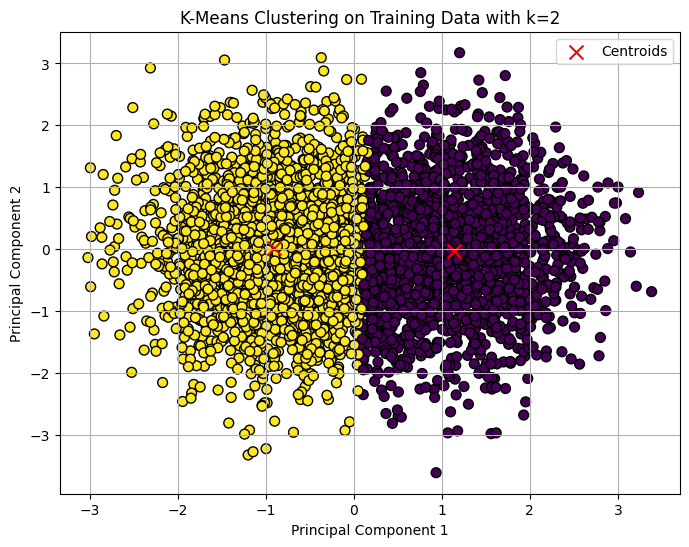

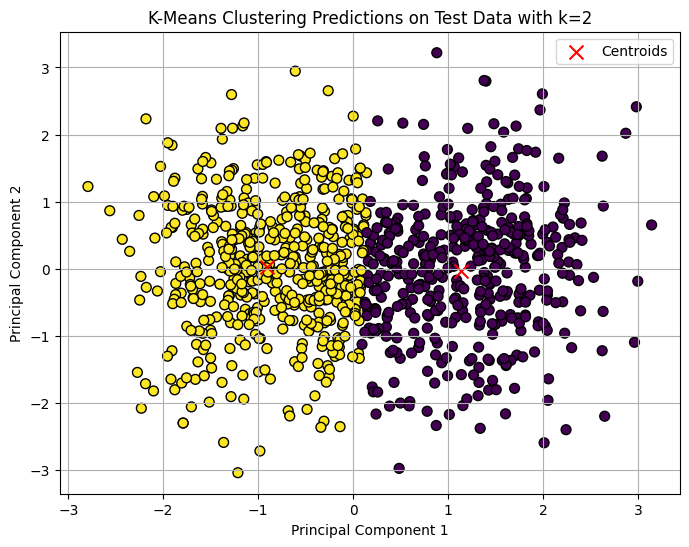

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

# Load data
data = pd.read_csv('dts.csv')

# 1. Omit the last attribute (assuming it's unnecessary for clustering)
data = data.iloc[:, :-1]

# 2. Handle Missing Values (impute with mean for numerical features)
data.fillna(data.mean(), inplace=True)

# 3. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 4. Remove Outliers using Z-score method
z_scores = stats.zscore(scaled_data)
filtered_data = scaled_data[(abs(z_scores) < 3).all(axis=1)]

# 5. Dimensionality Reduction using PCA (reducing to 2 components for visualization)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(filtered_data)

# 6. Apply K-Means Clustering and determine the optimal k using the Elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph to visualize the optimal k
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Assuming the optimal k is determined by the elbow graph, e.g., k=3
optimal_k = 2  # Replace this value based on elbow graph if different
kmeans = KMeans(n_clusters=optimal_k, random_state=0)

# 7. Split the data into training and testing sets
X_train, X_test = train_test_split(reduced_data, test_size=0.2, random_state=0)

# 8. Train the K-Means model on the training data
kmeans.fit(X_train)

# 9. Predict the cluster labels for both training and testing sets
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

# 10. Plotting the clustered training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering on Training Data with k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

# 11. Plotting the clustered test data with predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering Predictions on Test Data with k={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the training data
train_silhouette_score = silhouette_score(X_train, train_labels)
print(f"Silhouette Score for Training Data: {train_silhouette_score}")

# Calculate silhouette score for the test data
test_silhouette_score = silhouette_score(X_test, test_labels)
print(f"Silhouette Score for Test Data: {test_silhouette_score}")


Silhouette Score for Training Data: 0.3807384812894082
Silhouette Score for Test Data: 0.3944462432329942


Silhouette Score for k=2: 0.38422133920032986
Silhouette Score for k=3: 0.3510822370096286
Silhouette Score for k=4: 0.330070578723112
Silhouette Score for k=5: 0.3352347526314747
Silhouette Score for k=6: 0.336645943493825
Silhouette Score for k=7: 0.33358008124214433
Silhouette Score for k=8: 0.3197866791133637
Silhouette Score for k=9: 0.31656867241093845
Silhouette Score for k=10: 0.31919862197044585
Optimal number of clusters (k) based on silhouette score: 2


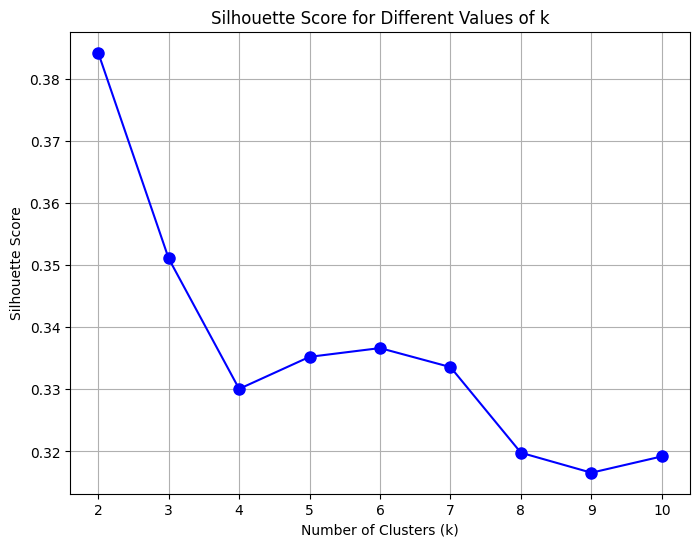

In [20]:
from sklearn.metrics import silhouette_score

# Range of k values to test
K = range(2, 11)  # Start from 2 since silhouette score isn't defined for k=1
silhouette_scores = []

# Iterate over each k to compute the silhouette score
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(reduced_data)  # Fit and predict labels on the entire reduced data
    score = silhouette_score(reduced_data, cluster_labels)  # Calculate silhouette score
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

# Find the k with the highest silhouette score
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (k) based on silhouette score: {optimal_k}")

# Optional: Plot silhouette scores for each k to visualize
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.grid(True)
plt.show()


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn-extra from https://files.pythonhosted.org/packages/22/2f/86f58cb2bd3f81bdb28555470761c27c0d62a566329aac70e8507cb744fd/scikit_learn_extra-0.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/340.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/340.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/340.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/340.5 kB ? eta -:--:--
   --- ----------------------------------- 30.7/340.5 kB 131.3 kB/s eta 0:00:03
   ---- ---------------------------------- 41.0/340.5 kB 151.3 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/340.5 kB 193.2 kB/s eta 0:00:02
   ------- -----------

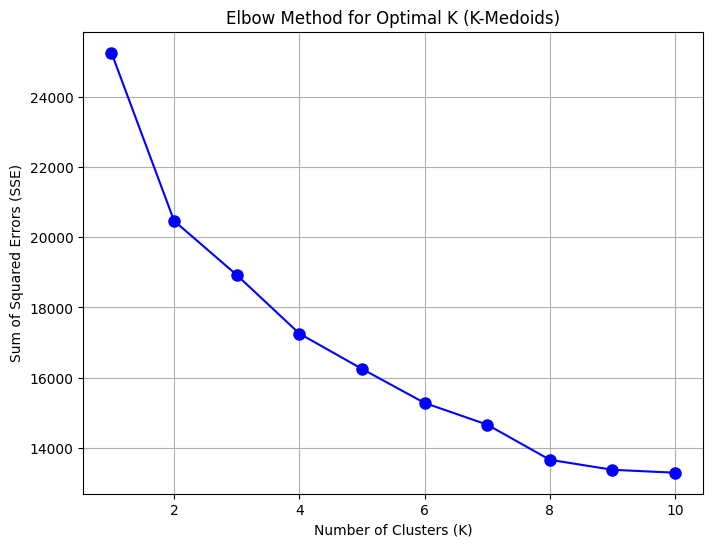

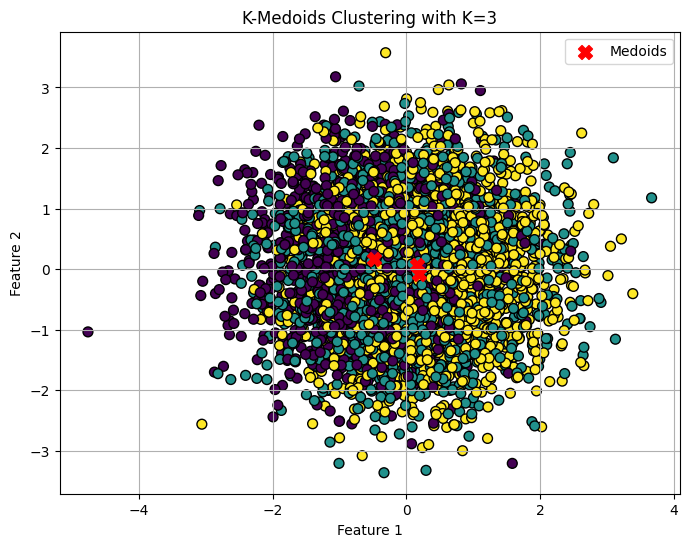

In [23]:
!pip install scikit-learn-extra

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances

# Load dataset
data = pd.read_csv('dts.csv')

# Preprocess data: remove last column if necessary and handle missing values
data = data.iloc[:, :-1]  # Drop the last column (if needed)
data.fillna(data.mean(), inplace=True)  # Fill missing values with the mean of the column
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

def calculate_sse(X, labels, medoids):
    # Calculate SSE for a given set of labels and medoids
    sse = 0
    for i, medoid in enumerate(medoids):
        cluster_points = X[labels == i]
        sse += np.sum(np.linalg.norm(cluster_points - medoid, axis=1) ** 2)
    return sse

# Try different values of K (number of clusters)
sse_values = []
K_range = range(1, 11)  # Check for K values from 1 to 10

for k in K_range:
    # K-Medoids clustering
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(scaled_data)
    labels = kmedoids.labels_
    medoids = kmedoids.cluster_centers_

    # Calculate SSE
    sse = calculate_sse(scaled_data, labels, medoids)
    sse_values.append(sse)

# Plot the Elbow curve to find the optimal K
plt.figure(figsize=(8, 6))
plt.plot(K_range, sse_values, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K (K-Medoids)')
plt.grid(True)
plt.show()

optimal_k = 3  # Replace this with the optimal K found from the elbow method

# Perform K-Medoids clustering with the optimal K
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids.fit(scaled_data)

# Get the labels and medoids
labels = kmedoids.labels_
medoids = kmedoids.cluster_centers_

# Visualize the clustering results (assuming 2D data for visualization)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', s=100, label='Medoids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Medoids Clustering with K={optimal_k}')
plt.legend()
plt.grid(True)
plt.show()
